In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [11]:
def f(x, a, b):
    """
    Parameters
        x: ndarray of x-values
        a: slope
        b: intercept
        
    Returns: ndarray of line
    """
    return a*x + b

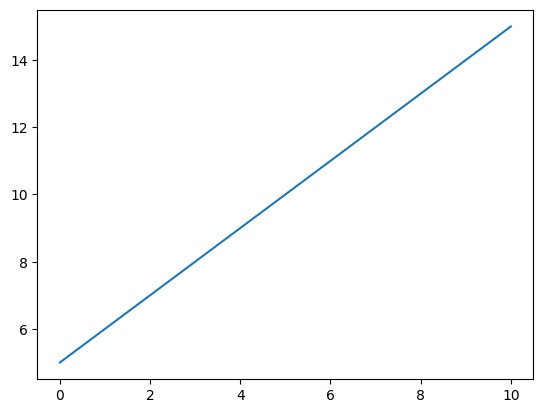

In [10]:
x = np.linspace(0,10,100)
y = f(x, 1, 5)
plt.plot(x,y)
plt.show()

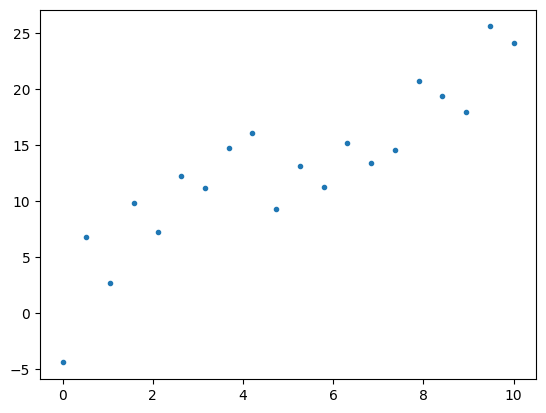

In [20]:
n = 20
x = np.linspace(0,10,n)
y = 2*x + 3 + np.random.normal(scale=3, size=n)
plt.plot(x,y,'.')
plt.show()

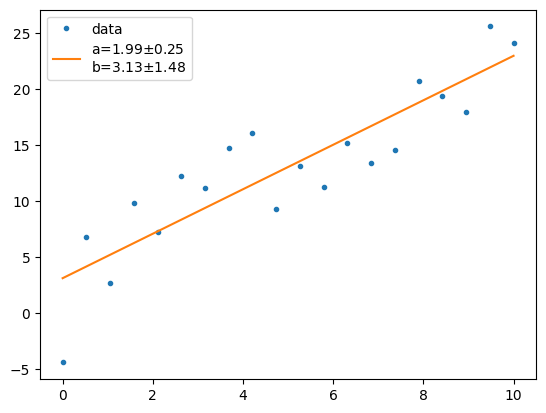

In [53]:
popt, pcov = curve_fit(f, x, y)
perr = np.sqrt(np.diag(pcov))
label = f'a={popt[0]:.2f}$\pm${perr[0]:.2f}'
label += f'\nb={popt[1]:.2f}$\pm${perr[1]:.2f}'

fig, ax = plt.subplots()
ax.plot(x,y,'.', label='data')
ax.plot(x, f(x,*popt), label=label)
ax.legend()
plt.show()

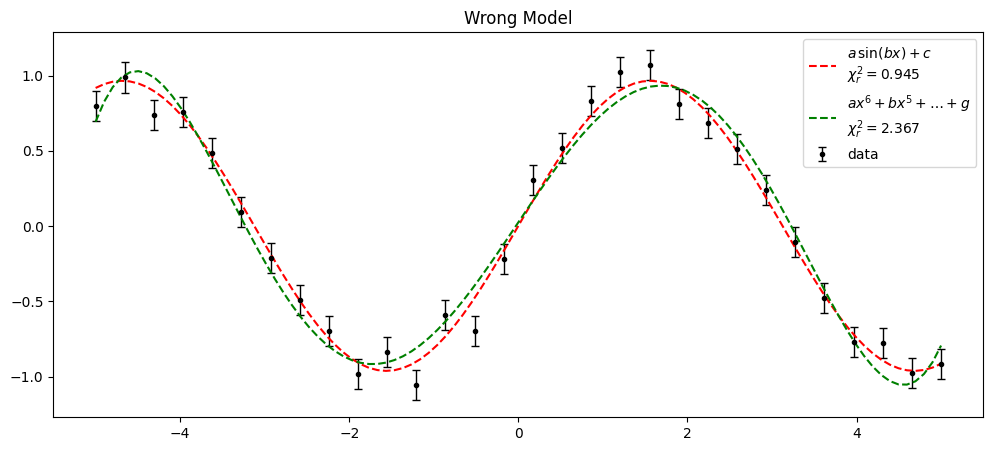

In [95]:
n = 30
np.random.seed(55)
x = np.linspace(-5,5,n)
xplus = np.linspace(-5,5,100)
y = np.sin(x) + np.random.normal(scale=0.1, size=n)
sigma = 0.1*np.ones(n)

fig, ax = plt.subplots(figsize=(12,5))
ax.errorbar(x, y, sigma,fmt='.k', label='data', capsize=3, elinewidth=1)

def sin(x, a, b, c):
    return a*np.sin(b*x) + c
popt, pcov = curve_fit(sin, x, y)
ax.plot(xplus, sin(xplus,*popt), '--r', label=f'$a\,\sin(bx)+c$\n$\chi^2_r =${np.sum(((y-sin(x,*popt))/sigma)**2)/(n-3):.3f}')

def f(x, a, b, c, d, e, f, g):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 
popt, pcov = curve_fit(f, x, y)
ax.plot(xplus, f(xplus,*popt), '--g', label=f'$ax^6+bx^5+\dots+g$\n$\chi^2_r =${np.sum(((y-f(x,*popt))/sigma)**2)/(n-9):.3f}')

ax.legend()
ax.set_title('Wrong Model')
plt.savefig('wrong.png', bbox_inches='tight', dpi=300)
plt.show()

In [88]:
popt, pcov = curve_fit(sin, x, y)
print(np.sum((y-sin(x,*popt))**2))

popt, pcov = curve_fit(f, x, y)
print(np.sum((y-f(x,*popt))**2))

0.2552713857665494
0.49699492162713665
